In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# Silica properties

# These numbers roughly reproduce the results in
# https://opg.optica.org/ol/abstract.cfm?uri=ol-32-15-2200
E     = 300 * 1e9  # Young's modulus; Pa; usually silica has ~73 GPa
sigma = 0.17       # Poisson's ratio
rho   = 2200       # kg / m^3

cl = np.sqrt(E * (1 - sigma) / (rho * (1 + sigma) * (1 - 2 * sigma)))
ct = np.sqrt(E / (2 * rho * (1 + sigma)))

In [196]:
lam = E * sigma / ( (1 + sigma) * (1 - 2 * sigma) )
mu  = E / (2 * (1 + sigma))

v0 = np.sqrt((lam + 2 * mu) / rho)
v1 = np.sqrt(mu / rho)

In [204]:
# These two functions give the same result
def func_landau(ff, R, cl, ct):
    omega = 2 * np.pi * ff

    kk = omega / cl
    
    return np.tan(kk * R) / (kk * R) - 1 / (1 - (kk* R * cl / 2 / ct)**2)

def func(ff, R, v0, v1):
    omega = 2 * np.pi * ff

    kk = omega / v1
    hh = omega / v0
    
    return np.tan(hh * R) / (hh * R) - 1 / (1 - 0.25 * (kk**2 * R**2))

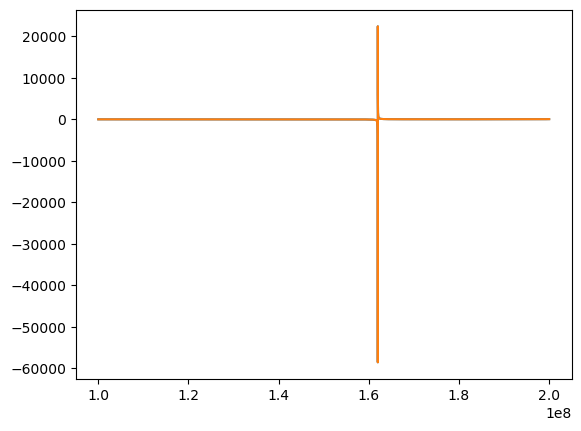

In [206]:
R = 15e-6 # 30 um sphere

ff = np.linspace(1e8, 2e8, 20000)

plt.plot(ff, func(ff, R, v0, v1))
plt.plot(ff, func_landau(ff, R, cl, ct))